In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import operator
import os, shutil
import pprint
from matplotlib import pyplot as plt
from IPython.display import Math
import pypropep as ppp

In [2]:
plt.style.use(u'ggplot')
plt.rcParams['figure.figsize'] = (10,6)

## Initalization
First we must initalize the library to load the thermo and propellant files.  Note that they can be overriden in the init function.

In [3]:
help(ppp.init)
ppp.init()

Help on function init in module pypropep:

init(thermo_file=None, propellant_file=None)

Loaded 1921 thermo species
Loaded 1030 propellants


### Custom Data files
The propellant and thermo data files are located in the python package.  You can find them like this:

In [ ]:
print ppp.PROPELLANT_FILE
print ppp.THERMO_FILE

There are a few ways to add new propellants to pypropep.  One is to edit these files directly.  The other is to make a copy of one or both and pass the modified file into pyprope at init:

In [5]:
# First copy the file
shutil.copy(ppp.PROPELLANT_FILE, 'propellant.dat')

# Now add a line
with open('propellant.dat', 'a') as f:
    f.write('    1099 AMMONIUM DINITRAMIDE            4H   4O  4N    0    0    0   -285 .0000]')

# Now re-init pypropep and note that there is one more propellant loaded than before 1031 vs 1030
ppp.init(propellant_file='propellant.dat')

# Get rid of our temporary propellant.dat file (if you want you can keep it around, this is just an example)
os.remove('propellant.dat')

Loaded 1921 thermo species
Loaded 1031 propellants


In [7]:
# Now show that ADN is in the database:
pprint.pprint(ppp.find_propellant('ammonium di'))

[Propellant: H8N2O7CR2 - AMMONIUM DICHROMATE [96],
 Propellant: C2H4N4 - AMMONIUM DICYANAMIDE [97],
 Propellant: H4O4D4 - AMMONIUM DINITRAMIDE [1030]]


*TODO - We will be adding utilities to manage propellant.dat files in the future.*

### Pretty printing propellants
You can get a pretty formula if you want...

In [8]:
Math(ppp.PROPELLANTS['AMMONIUM ALUMINUM PERCHLORATE'].formula(tex=True))

<IPython.core.display.Math object>

### Auto-completion of propellants
Rather than searching, jupyter/ipython will auto-complete dictonary keys.  So you can simply do:

```
>>> p = ppp.PROPELLANTS['OXY[TAB]
```
and when you enter [tab] it will either autocomplete the key if there is only one match or pop-up a menu with all the keys that match to chose from.  

** Using iPython/Jupyter is really really nice if only for the tab-completion support.  This makes finding functions, propellants, function arguments and more very easy and interactive and I highly recommend it **

Note that it will only match from the beginning of the string so if you want to match something mid-name then you'll still have to use find_propellant.

### Sanity checking properties
Let's see how well cpropep is computing thermo properties for nitrogen. [TODO: Put reference properties here]

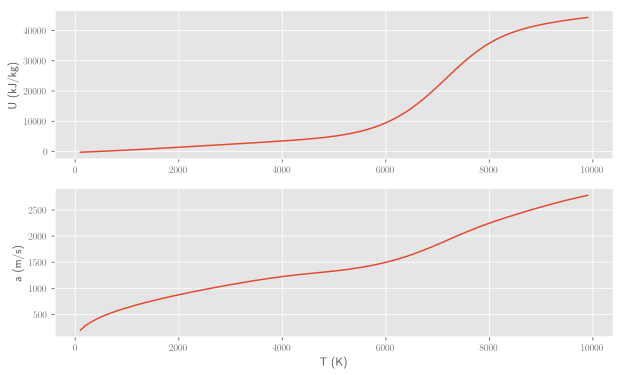

In [6]:
e = ppp.Equilibrium()
air = ppp.PROPELLANTS['NITROGEN (GASEOUS)']
e.add_propellant(air, 1.)
T_v = np.arange(100, 10000, 100)
U_v = np.zeros_like(T_v)
a_v = np.zeros_like(T_v)
for i in xrange(len(T_v)):
    e.set_state(P=1., T=T_v[i], type='TP')
    U_v[i] = e.properties.U
    a_v[i] = e.properties.Vson

ax = plt.subplot(211)
plt.plot(T_v, U_v)
plt.ylabel('U (kJ/kg)')

plt.subplot(212, sharex=ax)
plt.plot(T_v, a_v)
plt.xlabel('T (K)')
plt.ylabel('a (m/s)')


In [7]:
e.set_state(P=1., T=273, type='TP')
print e
print 'Composition: ',
pprint.pprint(e.composition)

Status:
	Equillibrium Computed: True
	Properties Computed: True
	Performance Computed: False
Composition:
	NITROGEN (GASEOUS) - 1.000 mol
State:
	Pressure: 1.000 atm 
	Temperature: 273.0 K 
	Enthalpy: -26.143 kJ/kg 
	Int. Energy: -107.171 kJ/kg 
	Gibbs Free Energy: -1867.365 kJ/kg 
	Entropy: 6.744 kJ/kg-K 
	Molar Mass: 28.013 g/mol 
	dV_P: -1.000
	dV_T: 1.000
	Cp: 1.039 kJ/kg-K
	Cv: 0.743 kJ/kg-K
	gamma: 1.400
	Sound Speed: 336.8 m/s
	
	
Composition: {'N': 0.0, 'N2': 1.0, 'N3': 0.0}



### Setting up equllibrium calculations
Below is an example for how to setup a simple equillibrium calculation.  We'll use the water gas shift (WGS) reaction to demonstrate.

First load propellants...

In [8]:
e2 = ppp.Equilibrium()
h2o = ppp.PROPELLANTS['WATER']
co = ppp.PROPELLANTS['CARBON MONOXIDE']
e2.add_propellants([(h2o, 1.), (co, 1.)])
print e2

Status:
	Equillibrium Computed: False
	Properties Computed: False
	Performance Computed: False
Composition:
	WATER - 1.000 mol
	CARBON MONOXIDE - 1.000 mol
State:
	Pressure: 0.000 atm 
	Temperature: 0.0 K 
	Enthalpy: 0.000 kJ/kg 
	Int. Energy: 0.000 kJ/kg 
	Gibbs Free Energy: 0.000 kJ/kg 
	Entropy: 0.000 kJ/kg-K 
	Molar Mass: 0.000 g/mol 
	dV_P: 0.000
	dV_T: 0.000
	Cp: 0.000 kJ/kg-K
	Cv: 0.000 kJ/kg-K
	gamma: 0.000
	Sound Speed: 0.0 m/s
	
	


Then let's specify state an equillibrate:

In [9]:
e2.set_state(P=1., T=500., type='TP')
print e2
pprint.pprint(e2.composition_sorted[0:8])

Status:
	Equillibrium Computed: True
	Properties Computed: True
	Performance Computed: False
Composition:
	WATER - 1.000 mol
	CARBON MONOXIDE - 1.000 mol
State:
	Pressure: 1.000 atm 
	Temperature: 500.0 K 
	Enthalpy: -9229.601 kJ/kg 
	Int. Energy: -9365.416 kJ/kg 
	Gibbs Free Energy: -12941.005 kJ/kg 
	Entropy: 7.423 kJ/kg-K 
	Molar Mass: 30.610 g/mol 
	dV_P: -1.001
	dV_T: 1.026
	Cp: 1.651 kJ/kg-K
	Cv: 1.366 kJ/kg-K
	gamma: 1.208
	Sound Speed: 405.0 m/s
	
	
[('H2O', 0.44804990720056304),
 ('CO2', 0.32396684598026537),
 ('CH4', 0.04800218103605304),
 ('H2', 0.003947889856670709),
 ('CO', 2.0850537817475025e-05),
 ('C2H6', 2.1906709927549387e-08),
 ('CH3COOH', 0.0),
 ('C4H8,cyclo-', 0.0)]


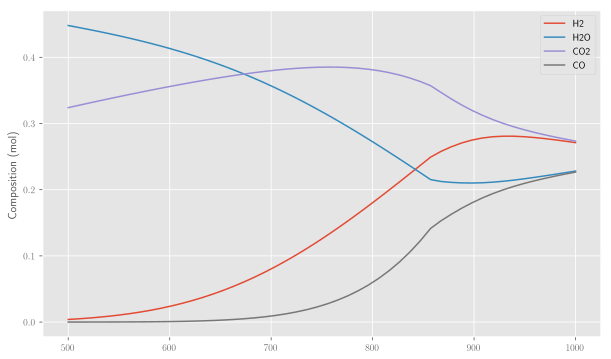

In [10]:
e2.reset()
Ru = 8.314     #kJ / kmol-K
T = np.linspace(500, 1000, 50)
comp = {
    "H2O" : [],
    "CO2" : [],
    "CO"  : [],
    "H2"  : []
}
# eq_const = []
# e2.set_state(P=1., T=300, type='TP')
# G0 = e2.properties.G
for i in xrange(len(T)):
    e2.set_state(P=1., T=T[i], type='TP')
    comp["H2O"].append(e2.composition["H2O"])
    comp["CO2"].append(e2.composition["CO2"])
    comp["CO"].append(e2.composition["CO"])
    comp["H2"].append(e2.composition["H2"])
#     eq_const.append(np.exp(-(G0-e2.properties.G) * (e2.properties.M) / Ru / T[i]))

# ax = plt.subplot(211)
for s,c in comp.items():
    plt.plot(T, c, label=s)
plt.ylabel('Composition (mol)')
plt.legend(loc='best')

# plt.subplot(212,sharex=ax)
# plt.plot(T, eq_const)
# plt.xlabel('Temperature (K)')
# plt.ylabel('Equilibrium constant')

### Adiabatic flame temperature
Now let's do an adiabatic flame temperature problem.  We'll Methane/Oxygen beacause it's well known.

Note that

$$CH_4 + 8 \left[0.75 N_2 + 0.25 O_2\right] \rightarrow 2H_2O + CO_2 + 6 N_2$$

such that at stoichiometric equivalence ratio is defined such that:

$$\frac{N_{CH_4}}{N_{air}} = 0.125$$


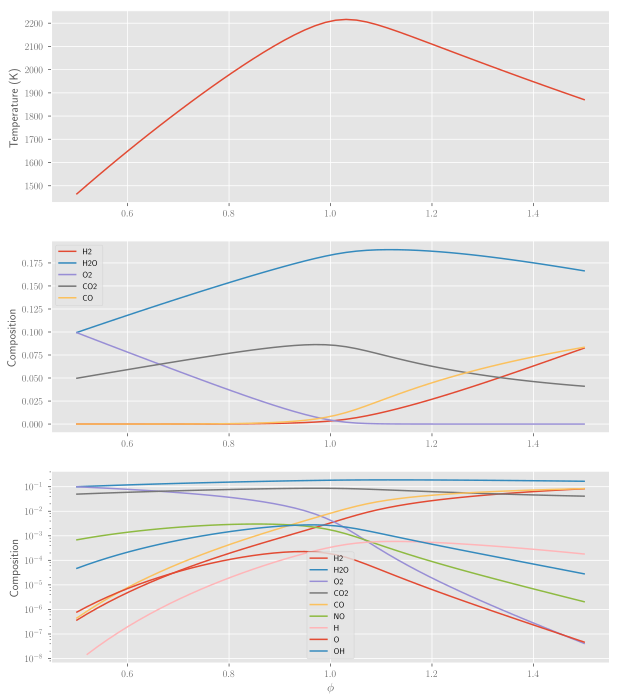

In [13]:
ch4 = ppp.PROPELLANTS['METHANE']
air = ppp.PROPELLANTS['AIR (DRY AT SEA LEVEL)']
species = ['H2', 'H2O', 'O2', 'CO2', 'CO']
species_log = ['NO', 'H', 'O', 'OH']
phi = np.linspace(0.5, 1.5, 50)
T_adiabatic = []
N_O_air = air.atoms_of('O')
N_C_ch4 = ch4.atoms_of('C')
N_H_ch4 = ch4.atoms_of('H')
N_ratio_st = N_O_air / (N_C_ch4 * 2 + N_H_ch4 / 2)

comp = dict()
for s in (species + species_log):
    comp[s] = []
for i in xrange(len(phi)):
    e3 = ppp.Equilibrium()
    n_fuel = phi[i] * N_ratio_st
    e3.add_propellants([(ch4, n_fuel), (air, 1.)])
    e3.set_state(P=1., type='HP')
    T_adiabatic.append(e3.properties.T)
    for s in (species + species_log):
        comp[s].append(e3.composition[s])

plt.figure(figsize=(10,12))
ax = plt.subplot(311)
plt.plot(phi, T_adiabatic)
plt.ylabel("Temperature (K)")

plt.subplot(312,sharex=ax)
for s in species:
    plt.plot(phi, comp[s], label=s)
plt.ylabel("Composition")
plt.legend(loc='best', fontsize='small')

plt.subplot(313,sharex=ax)
for s in (species + species_log):
    plt.semilogy(phi, comp[s], label=s)
plt.xlabel(r"$\phi$")
plt.ylabel("Composition")
plt.legend(loc='best', fontsize='small')